# Simple House Price Predicting Project
This project is used to somewhat predict the price of a house based on certain factors<br>

NAME    : Marvel Pangondian <br>
GDSC ID : 220010061 <br>
Path    : Machine Learning/Data Science <br>

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [154]:
data = pd.read_csv("DATA RUMAH.csv",delimiter=";")
data

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


Column Description : <br>
- NO : the number of the house
- NAMA RUMAH  : the name of each house (not important)
- HARGA : the price of each house
- LB : House land area (m<sup>2</sup>)
- LT : Land area (m<sup>2</sup>)
- KT : Number of bedrooms for each house
- KM : Number of bathrooms for each house
- GRS : Garage capacity for cars (how many cars can fit in the garage)


Checking dataset


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


Drop null values

In [156]:
data.dropna() #drop all rows that contain null values


,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


Using sklearn to seperate dataset to two parts

In [157]:
X = data.drop(['HARGA','NAMA RUMAH','NO'],axis=1)
Y = data['HARGA']

In [158]:
X # data set without harga column

,LB,LT,KT,KM,GRS
0,220,220,3,3,0
1,180,137,4,3,2
2,267,250,4,4,4
3,40,25,2,2,0
4,400,355,6,5,3
...,...,...,...,...,...
1005,450,550,10,10,3
1006,160,140,4,3,2
1007,139,230,4,4,1
1008,360,606,7,4,0


In [159]:
Y ## dataset harga

0        3800000000
1        4600000000
2        3000000000
3         430000000
4        9000000000
           ...     
1005     9000000000
1006     4000000000
1007     4000000000
1008    19000000000
1009    10500000000
Name: HARGA, Length: 1010, dtype: int64

In [160]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2) #test data

In [161]:
train_data = X_train.join(Y_train)

In [162]:
train_data

,LB,LT,KT,KM,GRS,HARGA
615,140,140,3,2,1,4500000000
875,150,205,5,2,2,8800000000
705,150,102,3,3,1,2800000000
991,128,135,3,2,1,2150000000
898,350,240,6,4,3,9000000000
...,...,...,...,...,...,...
914,160,135,4,3,1,3200000000
670,250,145,8,8,0,3800000000
709,147,107,6,4,1,5500000000
200,150,87,4,3,2,3200000000


array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'LT'}>],
       [<Axes: title={'center': 'KT'}>, <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'GRS'}>,
        <Axes: title={'center': 'HARGA'}>]], dtype=object)

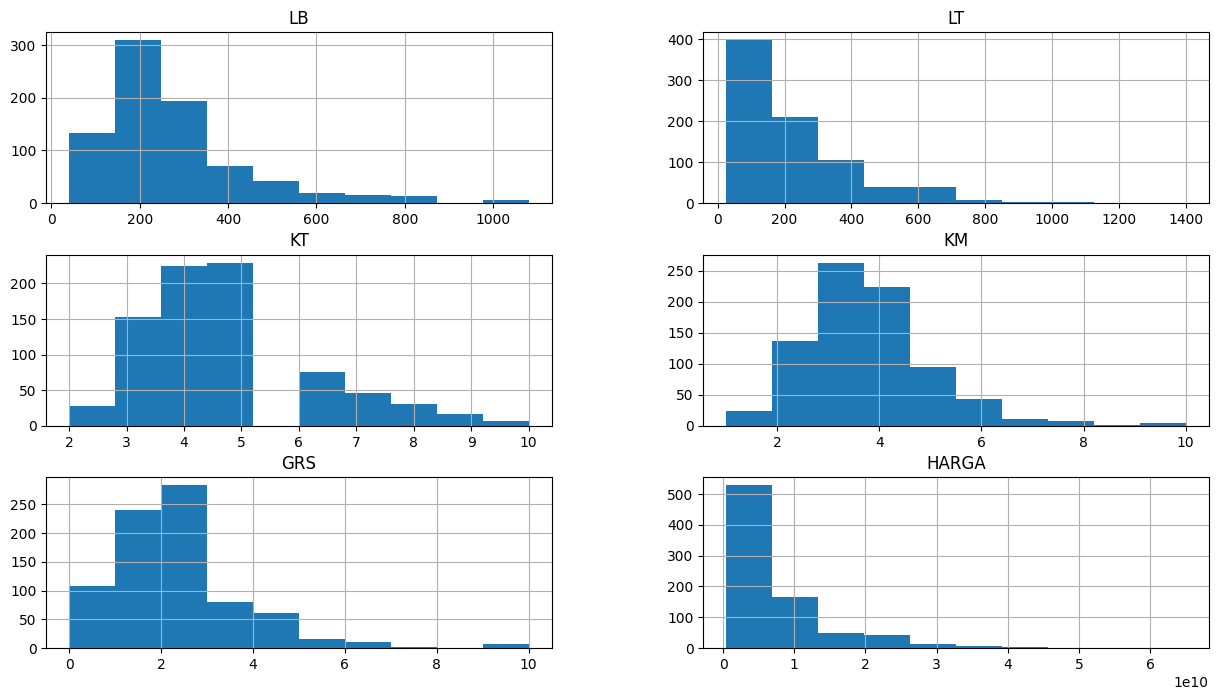

In [163]:
train_data.hist(figsize=(15,8)) # distribution of various features

# Correlation for each attribute with each other

<Axes: >

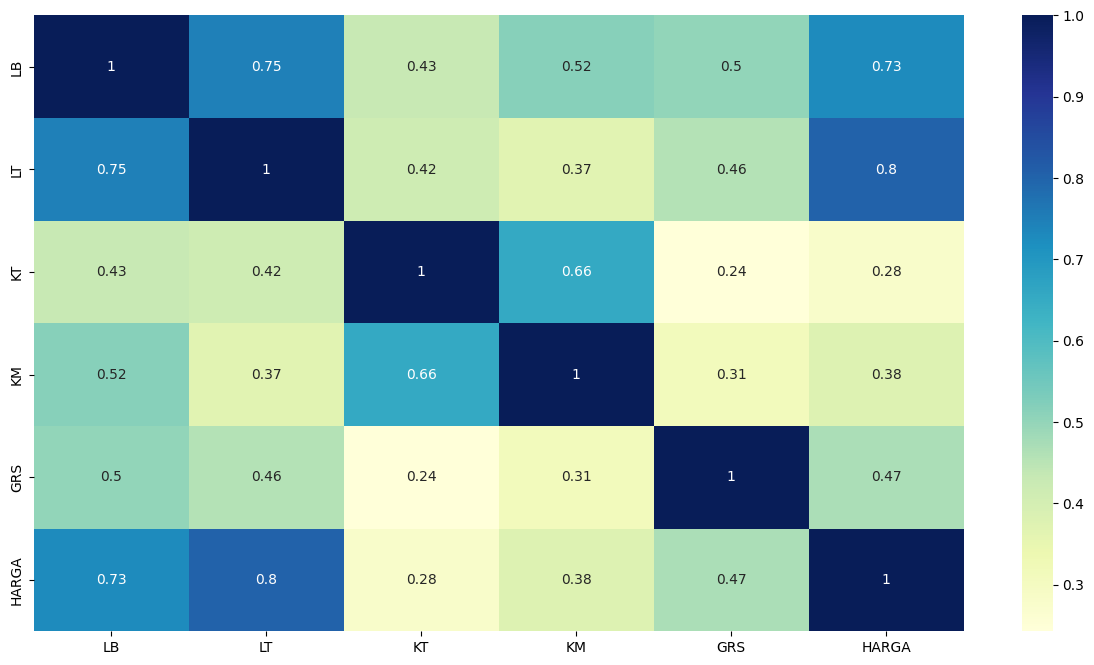

In [164]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#### As you can see from the data above, the attribute LT and LB have a much higher correlation with the attribute HARGA compared to the other attributes <br>
#### Those two attributes will be used heavily to predict the price of a house in this project

# Data Preprocessing

though we have skipped over some steps with predicting our data, the purpose of that is to get a basic understanding of which attribute affects house price <br>
note that ini this part of the project we will try to preprocess the data before using again

Fixing skewed data :

In [165]:
train_data['LB'] = np.log(train_data['LB'] + 1)
train_data['LT'] = np.log(train_data['LT'] + 1)
train_data['KT'] = np.log(train_data['KT'] + 1)
train_data['KM'] = np.log(train_data['KM'] + 1)
train_data['HARGA'] = np.log(train_data['HARGA'] + 1)
train_data['GRS'] = np.log(train_data['GRS'] + 1)

array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'LT'}>],
       [<Axes: title={'center': 'KT'}>, <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'GRS'}>,
        <Axes: title={'center': 'HARGA'}>]], dtype=object)

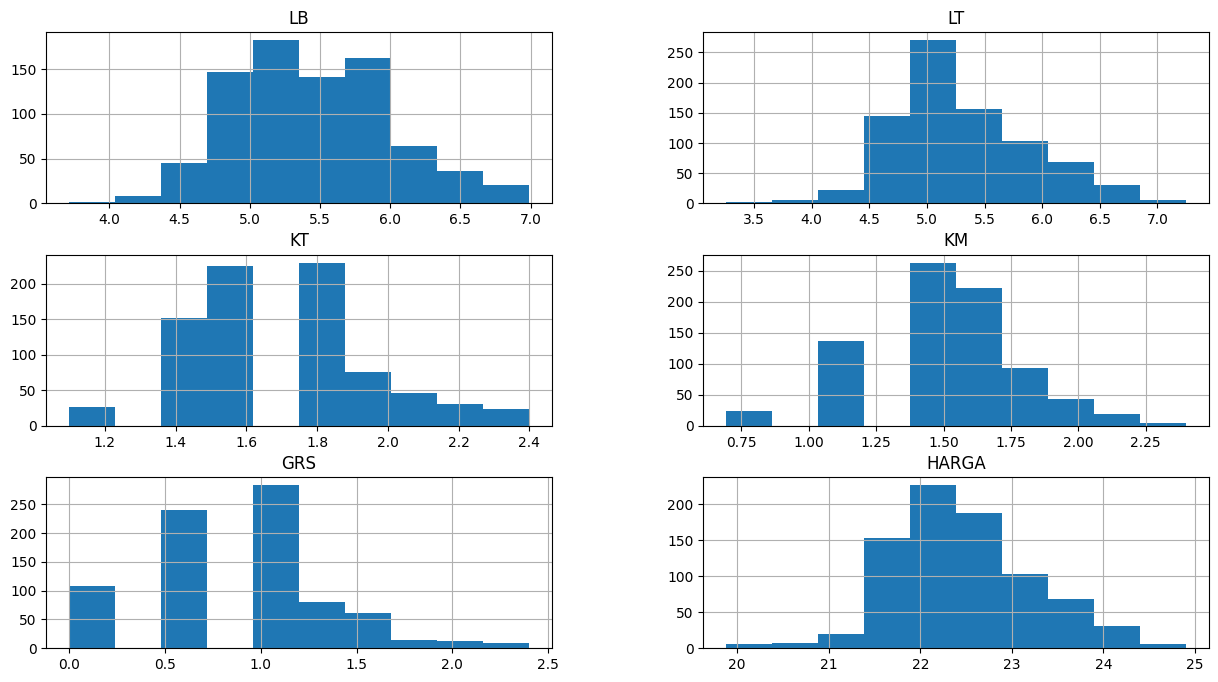

In [166]:
train_data.hist(figsize=(15,8))

The purpose of fixing some of this data is to get a gaussian distribution curve 

After fixing skewed data : 

<Axes: >

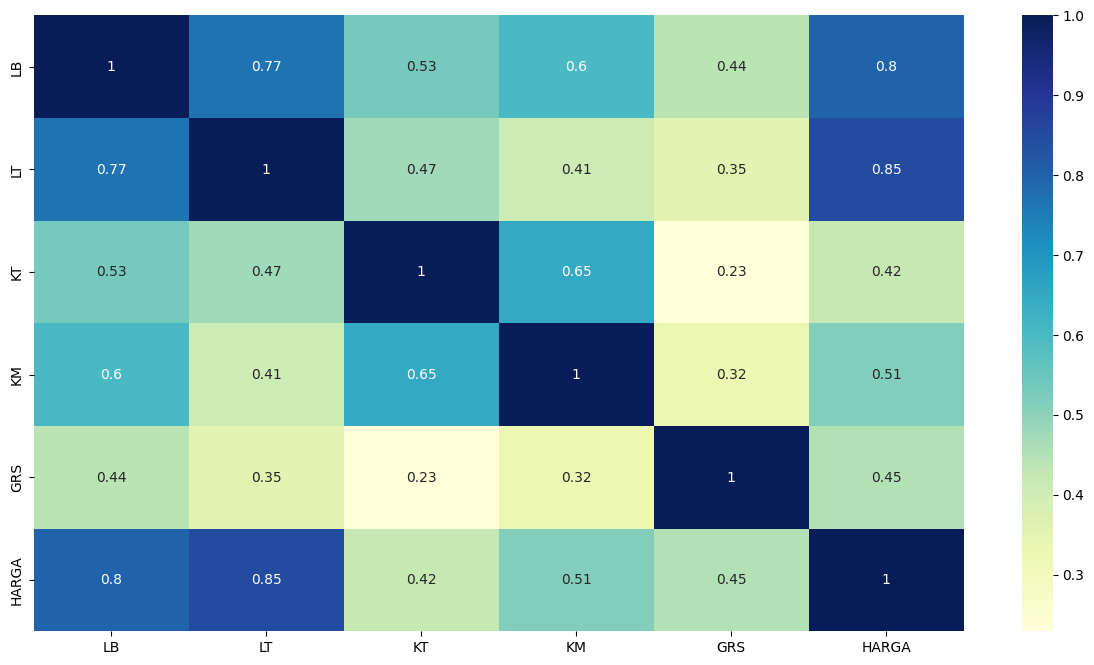

In [167]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Simple Linear Regression Model

In [168]:
from sklearn.linear_model import LinearRegression

X_train, Y_train = train_data.drop(['HARGA'],axis=1),train_data['HARGA']
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [169]:
test_data = X_test.join(Y_test)
test_data['LB'] = np.log(test_data['LB'] + 1)
test_data['LT'] = np.log(test_data['LT'] + 1)
test_data['KT'] = np.log(test_data['KT'] + 1)
test_data['KM'] = np.log(test_data['KM'] + 1)
test_data['HARGA'] = np.log(test_data['HARGA'] + 1)
test_data['GRS'] = np.log(test_data['GRS'] + 1)


In [170]:
X_test, Y_test = test_data.drop(['HARGA'],axis=1),test_data['HARGA']

In [171]:
reg.score(X_test,Y_test)

0.8585595815140444

# Conclusion

Regression score : 0.75 - 0.85. Score varies depend on data chosen (test_size = 0.2) <br>
The closer a regression score is to 1, the better our model is <br>
notice that our score is close to 1, therefore our model using LT, LB, KT, KM, and GRS is a good enough model to predict house prices in Indonesia (not really)<br>
Note that the regression model isn't really a good model, it's a "simple" model. The amount of features and data set in this project is not nearly enough to predict house prices in Indonesia. This is just a simple project done by a complete beginner <br>
There's bound to be plenty of mistakes done in this project, this is simply a test run to develop my skills further <br><br>
sincerely, Marvel Pangondian